# TINA Djara Olivier

## Exercice 1

In [59]:
import os
import Levenshtein
import numpy as np
import scipy as sp
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

### 1. Récuperer le dataset du plagiarisme?

In [2]:
## Texte original
dossier = "plagitat_corpus/plagitat_corpus/original"
text_wikipedia = []
fichiers_dans_dossier = os.listdir(dossier)

for nom_fichier in fichiers_dans_dossier:
    chemin_complet = os.path.join(dossier, nom_fichier)
    if os.path.isfile(chemin_complet) and nom_fichier.endswith(".txt"):
        with open(chemin_complet, 'r', encoding='utf-8') as fichier:
            contenu = fichier.read()
            text_wikipedia.append(contenu)

## Texte PA
dossier1 = "plagitat_corpus/plagitat_corpus/PA"
PA = []
fichiers_dans_dossier = os.listdir(dossier1)

for nom_fichier in fichiers_dans_dossier:
    chemin_complet = os.path.join(dossier1, nom_fichier)
    if os.path.isfile(chemin_complet) and nom_fichier.endswith(".txt"):
        with open(chemin_complet, 'r', encoding='utf-8') as fichier:
            contenu = fichier.read()
            PA.append(contenu)

## Texte PB
dossier2 = "plagitat_corpus/plagitat_corpus/PB"
PB = []
fichiers_dans_dossier = os.listdir(dossier2)

for nom_fichier in fichiers_dans_dossier:
    chemin_complet = os.path.join(dossier2, nom_fichier)
    if os.path.isfile(chemin_complet) and nom_fichier.endswith(".txt"):
        with open(chemin_complet, 'r', encoding='utf-8') as fichier:
            contenu = fichier.read()
            PB.append(contenu)

## Texte PC
dossier3 = "plagitat_corpus/plagitat_corpus/PC"
PC = []
fichiers_dans_dossier = os.listdir(dossier3)

for nom_fichier in fichiers_dans_dossier:
    chemin_complet = os.path.join(dossier3, nom_fichier)
    if os.path.isfile(chemin_complet) and nom_fichier.endswith(".txt"):
        with open(chemin_complet, 'r', encoding='utf-8') as fichier:
            contenu = fichier.read()
            PC.append(contenu)

## Texte PD
dossier4 = "plagitat_corpus/plagitat_corpus/PD"
PD = []
fichiers_dans_dossier = os.listdir(dossier4)

for nom_fichier in fichiers_dans_dossier:
    chemin_complet = os.path.join(dossier4, nom_fichier)
    if os.path.isfile(chemin_complet) and nom_fichier.endswith(".txt"):
        with open(chemin_complet, 'r', encoding='utf-8') as fichier:
            contenu = fichier.read()
            PD.append(contenu)

## Texte PE
dossier5 = "plagitat_corpus/plagitat_corpus/PE"
PE = []
fichiers_dans_dossier = os.listdir(dossier5)

for nom_fichier in fichiers_dans_dossier:
    chemin_complet = os.path.join(dossier5, nom_fichier)
    if os.path.isfile(chemin_complet) and nom_fichier.endswith(".txt"):
        with open(chemin_complet, 'r', encoding='utf-8') as fichier:
            contenu = fichier.read()

            PE.append(contenu)

In [4]:
# Créer un dictionnaire avec les données
data = {
    'Original': text_wikipedia,
    'PA': PA,
    'PB': PB,
    'PC': PC,
    'PD': PD,
    'PE': PE
}

# Créer le DataFrame
df = pd.DataFrame(data)

# Afficher le DataFrame
df

,Original,PA,PB,PC,PD,PE
0,"In probability theory, Bayes' theorem (often c...",Inheritance is a basic concept of Object-Orien...,Vector space model is an algebraic model for r...,In probability theory; Bayes theorem (often ca...,PageRank algorithm is patented by Stanford Uni...,Bayes Theorem is an important theorem relating...
1,"In mathematics and computer science, dynamic p...",Dynamic Programming is an algorithm design tec...,Bayes' theorem relates the conditional and mar...,There are many attributes which infulance the ...,Dynamic programming (DP) is an extremely power...,The representation of a set of documents as ve...
2,Vector space model (or term vector model) is a...,"The vector space model (also called, term vect...",Inheritance is a basic concept in object orien...,inheritance in object oriented programming is ...,Baye’s theorm in connection with conditional p...,PageRank is a link analysis algorithm used by ...
3,"In object-oriented programming, inheritance is...",Bayes’ theorem was names after Rev Thomas Baye...,PageRank (PR) refers to both the concept and t...,In computer science; dynamic programming is a ...,Inheritance in object oriented programming is ...,dynamic programming is a method of solving pro...
4,PageRank is a link analysis algorithm used by ...,PageRank is a link analysis algorithm used by ...,Dynamic programming is a method for solving ma...,The vector space model is where each document ...,An algebraic model for representing text docum...,"In object-oriented programming, inheritance is..."


### 2. Réaliser les différentes tâches de prétraitement?

In [7]:
# Téléchargez les stopwords
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)

    # Prétraitement
    words = [ps.stem(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]

    return ' '.join(words)

# Appliquez le prétraitement à chaque colonne de votre DataFrame
df['Original_Preprocessed'] = df['Original'].apply(preprocess_text)
df[['PA_Preprocessed', 'PB_Preprocessed', 'PC_Preprocessed', 'PD_Preprocessed', 'PE_Preprocessed']] = df[['PA', 'PB', 'PC', 'PD', 'PE']].map(preprocess_text)


In [8]:
df

,Original,PA,PB,PC,PD,PE,Original_Preprocessed,PA_Preprocessed,PB_Preprocessed,PC_Preprocessed,PD_Preprocessed,PE_Preprocessed
0,"In probability theory, Bayes' theorem (often c...",Inheritance is a basic concept of Object-Orien...,Vector space model is an algebraic model for r...,In probability theory; Bayes theorem (often ca...,PageRank algorithm is patented by Stanford Uni...,Bayes Theorem is an important theorem relating...,probabl theori bay theorem often call bay law ...,inherit basic concept program basic idea creat...,vector space model algebra model repres text d...,probabl theori bay theorem often call bay law ...,pagerank algorithm patent stanford univers lin...,bay theorem import theorem relat condit probab...
1,"In mathematics and computer science, dynamic p...",Dynamic Programming is an algorithm design tec...,Bayes' theorem relates the conditional and mar...,There are many attributes which infulance the ...,Dynamic programming (DP) is an extremely power...,The representation of a set of documents as ve...,mathemat comput scienc dynam program method so...,dynam program algorithm design techniqu use op...,bay theorem relat condit margin probabl two ra...,mani attribut inful rank page googl main conte...,dynam program dp extrem power gener tool solv ...,represent set document vector common vector sp...
2,Vector space model (or term vector model) is a...,"The vector space model (also called, term vect...",Inheritance is a basic concept in object orien...,inheritance in object oriented programming is ...,Baye’s theorm in connection with conditional p...,PageRank is a link analysis algorithm used by ...,vector space model term vector model algebra m...,vector space model also call term vector model...,inherit basic concept object orient program mo...,inherit object orient program new class form u...,bay theorm connect condit probabl fundament im...,pagerank link analysi algorithm use googl inte...
3,"In object-oriented programming, inheritance is...",Bayes’ theorem was names after Rev Thomas Baye...,PageRank (PR) refers to both the concept and t...,In computer science; dynamic programming is a ...,Inheritance in object oriented programming is ...,dynamic programming is a method of solving pro...,program inherit way form new class instanc cal...,bay theorem name rev thoma bay method use prob...,pagerank pr refer concept googl system use ran...,comput scienc dynam program way solv problem c...,inherit object orient program way form new cla...,dynam program method solv problem exhibit prop...
4,PageRank is a link analysis algorithm used by ...,PageRank is a link analysis algorithm used by ...,Dynamic programming is a method for solving ma...,The vector space model is where each document ...,An algebraic model for representing text docum...,"In object-oriented programming, inheritance is...",pagerank link analysi algorithm use googl inte...,pagerank link analysi algorithm use googl inte...,dynam program method solv mathemat program pro...,vector space model document view bag word orde...,algebra model repres text document object gene...,program inherit way form new class instanc cal...


### 3. Récuperer la représetation vectorielle des differents document du corpus

In [20]:
vectorizer = TfidfVectorizer()

X_original = vectorizer.fit_transform(df['Original_Preprocessed'])
X_PA = vectorizer.transform(df['PA_Preprocessed'])
X_PB = vectorizer.transform(df['PB_Preprocessed'])
X_PC = vectorizer.transform(df['PC_Preprocessed'])
X_PD = vectorizer.transform(df['PD_Preprocessed'])
X_PE = vectorizer.transform(df['PE_Preprocessed'])

In [32]:
print(X_original)

  (0, 417)	0.04444766226004289
  (0, 257)	0.025041037605139406
  (0, 149)	0.02976711743316479
  (0, 192)	0.04444766226004289
  (0, 73)	0.03586009404616324
  (0, 249)	0.04444766226004289
  (0, 11)	0.04444766226004289
  (0, 421)	0.02976711743316479
  (0, 378)	0.04444766226004289
  (0, 418)	0.03586009404616324
  (0, 94)	0.02976711743316479
  (0, 95)	0.02976711743316479
  (0, 21)	0.021179549219285148
  (0, 184)	0.02976711743316479
  (0, 10)	0.04444766226004289
  (0, 394)	0.02976711743316479
  (0, 351)	0.03586009404616324
  (0, 291)	0.13334298678012868
  (0, 244)	0.02976711743316479
  (0, 79)	0.04444766226004289
  (0, 98)	0.03586009404616324
  (0, 161)	0.04444766226004289
  (0, 106)	0.04444766226004289
  (0, 35)	0.04444766226004289
  (0, 414)	0.04444766226004289
  :	:
  (4, 269)	0.016760988392298875
  (4, 445)	0.03352197678459775
  (4, 315)	0.02019176433203547
  (4, 331)	0.016760988392298875
  (4, 116)	0.02019176433203547
  (4, 24)	0.02019176433203547
  (4, 294)	0.016760988392298875
  (4, 2

### 4. Appliquer La SVD pour reduire la dimesion de la representation vectorielle des termes pour les representer dans un espace de dimension 2

In [24]:
svd = TruncatedSVD(n_components=2)

X_2d_original = svd.fit_transform(X_original)
X_2d_PA = svd.fit_transform(X_PA)
X_2d_PB = svd.fit_transform(X_PB)
X_2d_PC = svd.fit_transform(X_PC)
X_2d_PD = svd.fit_transform(X_PD)
X_2d_PE = svd.fit_transform(X_PE)

In [26]:
X_2d_original

array([[ 0.39726301,  0.44178123],
       [ 0.56845373, -0.44465641],
       [ 0.5467399 ,  0.17683724],
       [ 0.51973967, -0.45708506],
       [ 0.35896533,  0.6077036 ]])

### 5. Tracer les vecteurs obtenus en se servant de la bibliotheque matplolib

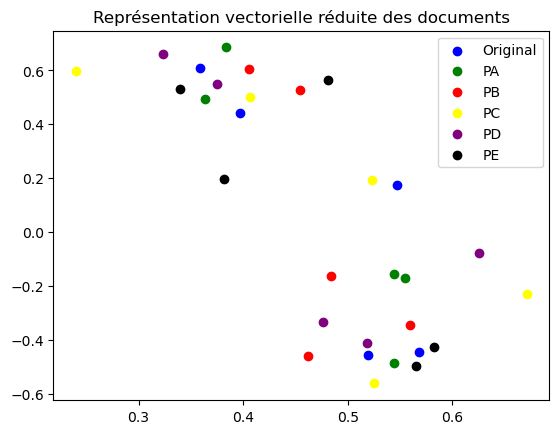

In [38]:
plt.scatter(X_2d_original[:, 0], X_2d_original[:, 1], c=['blue'], label='Original')
plt.scatter(X_2d_PA[:, 0], X_2d_PA[:, 1], c=['green'], label='PA')
plt.scatter(X_2d_PB[:, 0], X_2d_PB[:, 1], c=['red'], label='PB')
plt.scatter(X_2d_PC[:, 0], X_2d_PC[:, 1], c=['yellow'], label='PC')
plt.scatter(X_2d_PD[:, 0], X_2d_PD[:, 1], c=['purple'], label='PD')
plt.scatter(X_2d_PE[:, 0], X_2d_PE[:, 1], c=['black'], label='PE')

plt.legend()

plt.title('Représentation vectorielle réduite des documents')
plt.show()

### 6. En se servant de la représentation vectorielle obtenue, calculer les similarités entre les réponses des étudiants et les définitions trouvées sur Wikipédia. Réaliser une représentation vectorielle des documents en se basant sur les représentations vectorielles de leurs mots (une moyenne par exemple) et utiliser par la suite la distance euclidienne ou la distance corsinus.

In [39]:
# Calculer la moyenne des représentations vectorielles pour chaque document

def calculate_document_vectors(X_2d):
    return np.mean(X_2d, axis=0)

vector_original = calculate_document_vectors(X_2d_original)
vector_PA = calculate_document_vectors(X_2d_PA)
vector_PB = calculate_document_vectors(X_2d_PB)
vector_PC = calculate_document_vectors(X_2d_PC)
vector_PD = calculate_document_vectors(X_2d_PD)
vector_PE = calculate_document_vectors(X_2d_PE)

In [42]:
vector_original

array([0.47823233, 0.06491612])

### Calcul de similarité entre les documents

In [43]:
euclidean_similarity_PA = 1 / (1 + distance.euclidean(vector_original, vector_PA))
euclidean_similarity_PB = 1 / (1 + distance.euclidean(vector_original, vector_PB))
euclidean_similarity_PC = 1 / (1 + distance.euclidean(vector_original, vector_PC))
euclidean_similarity_PD = 1 / (1 + distance.euclidean(vector_original, vector_PD))
euclidean_similarity_PE = 1 / (1 + distance.euclidean(vector_original, vector_PE))

In [47]:
euclidean_similarity_PC

0.9653685342076591

In [44]:
cosine_similarity_PA = cosine_similarity([vector_original], [vector_PA])[0][0]
cosine_similarity_PB = cosine_similarity([vector_original], [vector_PB])[0][0]
cosine_similarity_PC = cosine_similarity([vector_original], [vector_PC])[0][0]
cosine_similarity_PD = cosine_similarity([vector_original], [vector_PD])[0][0]
cosine_similarity_PE = cosine_similarity([vector_original], [vector_PE])[0][0]

In [48]:
cosine_similarity_PA

0.9998258305066605

## Exercice 2

En se servant de la représentation vectorielle doc2vec, calculer les similarités entre les réponses des étudiants et les définitions trouvées sur Wikipédia.

In [53]:
# Créer des documents étiquetés pour chaque réponse
tagged_data = []

# Pour la réponse originale
for i, doc in enumerate(df['Original']):
    words = word_tokenize(doc.lower())
    tagged_data.append(TaggedDocument(words=words, tags=[f'Original_{i}']))

# Pour les réponses des étudiants
for col in ['PA', 'PB', 'PC', 'PD', 'PE']:
    for i, doc in enumerate(df[col]):
        words = word_tokenize(doc.lower())
        tagged_data.append(TaggedDocument(words=words, tags=[f'{col}_{i}']))

In [55]:
tagged_data[0]

TaggedDocument(words=['in', 'probability', 'theory', ',', 'bayes', "'", 'theorem', '(', 'often', 'called', 'bayes', "'", 'law', 'after', 'rev', 'thomas', 'bayes', ')', 'relates', 'the', 'conditional', 'and', 'marginal', 'probabilities', 'of', 'two', 'random', 'events', '.', 'it', 'is', 'often', 'used', 'to', 'compute', 'posterior', 'probabilities', 'given', 'observations', '.', 'for', 'example', ',', 'a', 'patient', 'may', 'be', 'observed', 'to', 'have', 'certain', 'symptoms', '.', 'bayes', "'", 'theorem', 'can', 'be', 'used', 'to', 'compute', 'the', 'probability', 'that', 'a', 'proposed', 'diagnosis', 'is', 'correct', ',', 'given', 'that', 'observation', '.', '(', 'see', 'example', '2', ')', 'as', 'a', 'formal', 'theorem', ',', 'bayes', "'", 'theorem', 'is', 'valid', 'in', 'all', 'common', 'interpretations', 'of', 'probability', '.', 'however', ',', 'it', 'plays', 'a', 'central', 'role', 'in', 'the', 'debate', 'around', 'the', 'foundations', 'of', 'statistics', ':', 'frequentist', 'an

### Le modele Doc2vec

In [56]:
from gensim.models import Doc2Vec

model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

### Embedding des differents documents

In [72]:
# Obtenir les représentations vectorielles des documents
vectors = [model.dv[f'{col}_{i}'] for col in ['Original', 'PA', 'PB', 'PC', 'PD', 'PE'] for i in range(len(df))]
# Convertir la liste en tableau numpy pour le redimensionnement
num_elements = len(df)

# Extraire les vecteurs pour chaque élément
vector_original = np.array(vectors[0:num_elements])
vector_PA = np.array(vectors[num_elements:num_elements*2])
vector_PB = np.array(vectors[num_elements*2:num_elements*3])
vector_PC = np.array(vectors[num_elements*3:num_elements*4])
vector_PD = np.array(vectors[num_elements*4:num_elements*5])
vector_PE = np.array(vectors[num_elements*5:num_elements*6])

# Afficher les dimensions des vecteurs
print("Dimension de vector_original:", vector_original.shape)
print("Dimension de vector_PA:", vector_PA.shape)
print("Dimension de vector_PB:", vector_PB.shape)
print("Dimension de vector_PC:", vector_PC.shape)
print("Dimension de vector_PD:", vector_PD.shape)
print("Dimension de vector_PE:", vector_PE.shape)


Dimension de vector_original: (5, 100)
Dimension de vector_PA: (5, 100)
Dimension de vector_PB: (5, 100)
Dimension de vector_PC: (5, 100)
Dimension de vector_PD: (5, 100)
Dimension de vector_PE: (5, 100)


### Calcul de similarités à partir des embeddings Doc2vec

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculer la similarité cosinus entre l'original et chaque réponse d'étudiant
similarity_PA = cosine_similarity(vector_original, vector_PA)
similarity_PB = cosine_similarity(vector_original, vector_PB)
similarity_PC = cosine_similarity(vector_original, vector_PC)
similarity_PD = cosine_similarity(vector_original, vector_PD)
similarity_PE = cosine_similarity(vector_original, vector_PE)

In [76]:
similarity_PA

array([[0.19169417, 0.35748935, 0.31721944, 0.67916125, 0.30661568],
       [0.30058166, 0.44330508, 0.346998  , 0.19033158, 0.13615587],
       [0.3059269 , 0.34594026, 0.96822774, 0.17895444, 0.2659827 ],
       [0.4061331 , 0.27296427, 0.3586547 , 0.2380539 , 0.33521232],
       [0.23362912, 0.20123313, 0.2627501 , 0.24062857, 0.9172955 ]],
      dtype=float32)